In [160]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Circle
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib import gridspec
from stemsegmentation import segmentationSTEM

In [171]:
image = np.load('../examples/CuGB.npy')

In [172]:
image = image[(200-30-15):(200+256+30+15),(367-30-15):(367+256+30+15)]

([], <a list of 0 Text yticklabel objects>)

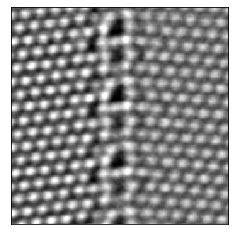

In [173]:
fig,ax = plt.subplots() 
ax.imshow(image,cmap='gray')
plt.xticks([])
plt.yticks([])

In [174]:
from stemreflection_symmetry_descriptors import image_reflection_symmetry

In [175]:
symmetries = image_reflection_symmetry(image, radius=30,nr=30,nt=60,num_reflection_plane=20)

In [176]:
symmetries.shape

(346, 346, 20)

([], <a list of 0 Text yticklabel objects>)

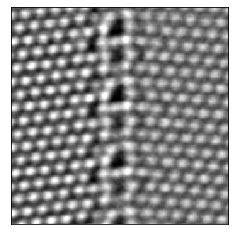

In [202]:
plt.imshow(image,cmap='gray')
plt.xticks([])
plt.yticks([])


In [204]:
shape = symmetries.shape

In [205]:
shape

(346, 346, 20)

([], <a list of 0 Text yticklabel objects>)

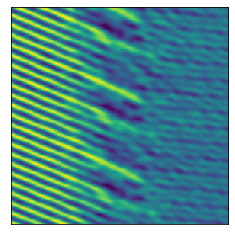

In [206]:
plt.imshow(symmetries[radius:(shape[0]-radius), radius:(shape[1]-radius),4])
plt.xticks([])
plt.yticks([])

([], <a list of 0 Text yticklabel objects>)

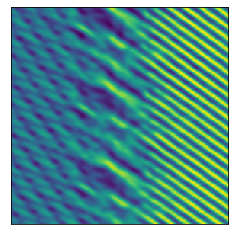

In [218]:
plt.imshow(symmetries[radius:(shape[0]-radius), radius:(shape[1]-radius),6])
plt.xticks([])
plt.yticks([])

In [219]:
window_x = 15
window_y  = 15
radius = 30

In [239]:
num_max = 1

In [240]:
shape = image.shape
x_index = np.arange(window_x+radius, shape[0]-window_x-radius,1)
y_index = np.arange(window_y+radius, shape[1]-window_y-radius,1)
descriptors = np.zeros((len(x_index),len(y_index),num_max,20),dtype=np.float32)

In [241]:
for i,ii in enumerate(x_index):
    for j,jj in enumerate(y_index):
        
        des_window = symmetries[(ii-window_x):(ii+window_x+1),(jj-window_y):(jj+window_y+1),:].copy()
        des_window = np.reshape(des_window, (-1, 20))
            
        # use sort to find n largest values   
        des_window = -np.sort(-des_window, axis=0)
        descriptors[i,j,:num_max,:] = des_window[:num_max,:]

([], <a list of 0 Text yticklabel objects>)

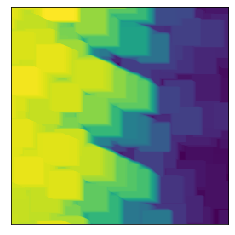

In [243]:
tt = descriptors[:,:,0,4]

plt.imshow(tt)
plt.xticks([])
plt.yticks([])

In [244]:
descriptors.shape

(256, 256, 1, 20)

([], <a list of 0 Text yticklabel objects>)

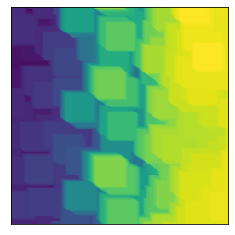

In [245]:
tt = descriptors[:,:,0,6]

plt.imshow(tt)
plt.xticks([])
plt.yticks([])

In [246]:
from sklearn.decomposition import PCA

In [247]:
pca = PCA(2)

In [248]:
descriptors = descriptors[:,:,0:1,:]

In [249]:
descriptors.shape

(256, 256, 1, 20)

In [250]:
shape = descriptors.shape
tt = pca.fit_transform(np.reshape(descriptors[:,:,:,:],(-1,shape[2]*shape[3])))
tt = np.reshape(tt,(shape[0],shape[1],-1))

In [251]:
tt.shape

(256, 256, 2)

([], <a list of 0 Text yticklabel objects>)

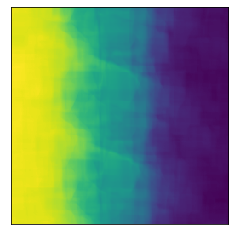

In [252]:
plt.imshow(tt[:,:,0])
plt.xticks([])
plt.yticks([])

In [69]:
import skimage.measure

In [71]:
symmetries.shape

(256, 256, 4)

In [11]:
step = 2
descriptor_name = 'rotational_symmetry_maximums'
seg = segmentationSTEM(n_patterns=2,
                       window_x=30,window_y=30,
                       step=step,
                       descriptor_name=descriptor_name,
                       max_num_points=1000000,
                       radius=30,
                       upsampling=True)
descriptors = seg.get_descriptors(image)

In [12]:
image.shape

(256, 256)

In [13]:
descriptors.shape

(58, 58, 40)

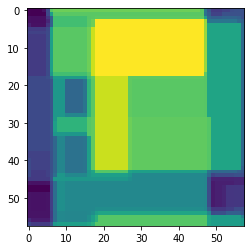

In [14]:
plt.imshow(descriptors[:,:,30])

In [5]:
center1 = np.array((170,150))  # coordinate in the image
center2 = np.array((202,133))  # coordinate in the image

In [6]:
descriptors = seg._descriptors
shape = descriptors.shape
descriptors = np.reshape(descriptors, (shape[0],shape[1],81,81))
des_one = descriptors[center1[1]-patch_w-region_w,center1[0]-patch_w-region_w]
des_one[0,0] = -1 # add -1 to the local correlation map so that the colorbar show -1.

NameError: name 'seg' is not defined

NameError: name 'des_one' is not defined

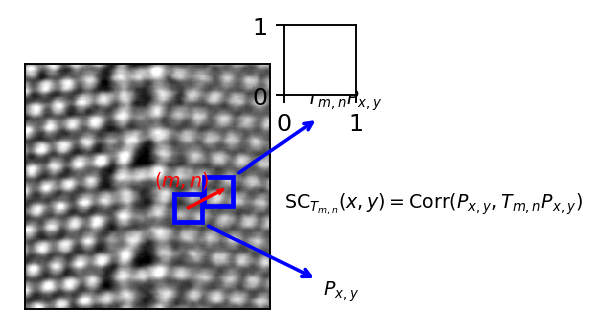

In [7]:
# Plot figure with subplots of different sizes

fontsize=8
fig, ax1 = plt.subplots(figsize=(2.5,2.5))
fig.set_dpi(1024/6)
# set up subplot grid
gridspec.GridSpec(3,3)

# large subplot1
ax = plt.subplot2grid((4,4), (0,0), colspan=3, rowspan=4)
plt.imshow(image,cmap='gray')
plt.xticks([])
plt.yticks([])

#plt.plot([center1[0]], [center1[1]], 'x',color='orange', markersize=4)
box1 = Rectangle((center1[0]-patch_w, center1[1]-patch_w), 2*patch_w, 2*patch_w, ec="blue", lw=2.0, fill=False)
plt.annotate('$P_{x,y}$', fontsize=fontsize, xy=(center1[0]+patch_w+2, center1[1]+patch_w+2),
            xycoords='data', xytext=(50, -30),
            textcoords='offset points',
            arrowprops=dict(arrowstyle="<-",
                            linewidth = 1.5,
                            color = 'blue')
            )


box2 = Rectangle((center2[0]-patch_w, center2[1]-patch_w), 2*patch_w, 2*patch_w, ec="blue", lw=2.0, fill=False)
plt.annotate('$T_{m,n}P_{x,y}$', fontsize=fontsize, xy=(center2[0]+patch_w+2, center2[1]-patch_w-2),
            xycoords='data', xytext=(30, 30),
            textcoords='offset points',
            arrowprops=dict(arrowstyle="<-",
                            linewidth = 1.5,
                            color = 'blue')
            )


plt.text( 270,150, '$\mathrm{SC}_{T_{m,n}}(x,y)=\mathrm{Corr}(P_{x,y}, T_{m,n}P_{x,y}) $',fontsize=fontsize )
ax.add_patch(box1)
ax.add_patch(box2)
plt.arrow(center1[0],center1[1], center2[0]-center1[0],center2[1]-center1[1],width=1,color='red',head_width=4)
plt.text(134,127,'($m,n$)',color='red',fontsize=fontsize)

ax = plt.subplot2grid((4,4), (0,3),colspan=1,rowspan=1,)
pos = ax.imshow(des_one, cmap='viridis', interpolation='none')

#cbar.ax.set_yticklabels(['-1', '0', '1']) 
ax.set_xticks([])
ax.set_yticks([])
arr = np.array(center2)-np.array(center1)
ax.arrow(region_w,region_w,arr[0],arr[1],width=1,color='red',head_width=4)

ax.text(10,20,'($m,n$)',color='red',fontsize=fontsize)
l, b, w, h = ax.get_position().bounds

axins = inset_axes(ax,
                   width="10%",  # width = 5% of parent_bbox width
                   height="90%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.2, 0., 1, 1),
                   bbox_transform=ax.transAxes,
                   borderpad=0,
                   )
cbar = fig.colorbar(pos, cax=axins,ticks=[-1,0,1],)
cbar.ax.tick_params(labelsize=fontsize)
ax.set_position([1.2, b, w, 1*h])

ax.arrow(-50,180,50,-70,clip_on = False,width=5,fill=False,color='black')
#ax.text(20,110,'LCM$(x,y)$',fontsize=fontsize)

plt.xticks([])
plt.yticks([])

In [8]:
from stemrotational_symmetry_descriptors import reproject_image_into_polar

In [9]:
center = np.array((160,182))  # coordinate in the image
radius=30

In [10]:
polar_data, r_grid, theta_grid = reproject_image_into_polar(image,(160,182),radius=radius,nr=30,nt=60, Jacobian=True)

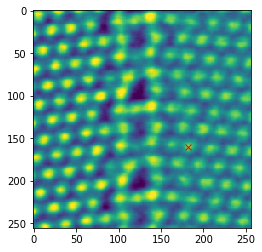

In [11]:
plt.imshow(image)
plt.plot([182,],[160,],'rx')

In [12]:
data = np.concatenate([polar_data,polar_data[:,0:1]],axis=1)
r =  np.concatenate([r_grid,r_grid[:,0:1]],axis=1)
theta =  np.concatenate([theta_grid,theta_grid[:,0:1]],axis=1)

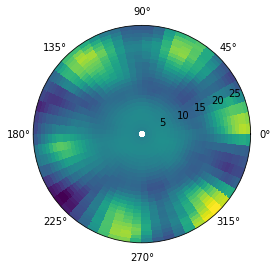

In [13]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

fig = plt.figure()
ax = Axes3D(fig)

plt.subplot(projection="polar")

plt.pcolormesh(theta, r, data)
plt.plot(theta, r, color='k', ls='none') 
plt.show()

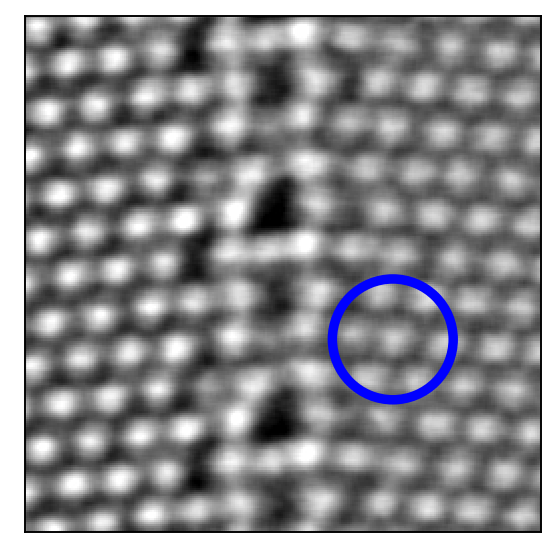

In [19]:
fontsize=8
fig, ax = plt.subplots()
fig.set_dpi(1024/6)
# set up subplot grid
gridspec.GridSpec(3,3)

# large subplot1
plt.imshow(image,cmap='gray')
plt.xticks([])
plt.yticks([])
center1 = np.array((170,150))  # coordinate in the image
patch_w = 15
region_w = 40
circle1 = Circle((center[1],center[0]), radius=radius,fill=False,color='b',linewidth=4)
#plt.plot([center[1],],center[0], 'rx')
#plt.annotate('', fontsize=fontsize, xy=(center[1]+30,center[0]),
#            xycoords='data', xytext=(75, 10),
#            textcoords='offset points',
#            arrowprops=dict(arrowstyle="<-"
#                            linewidth = 1.5,
#                            color = 'blue')
#            )

ax.add_patch(circle1)

NameError: name 'data_reflect' is not defined

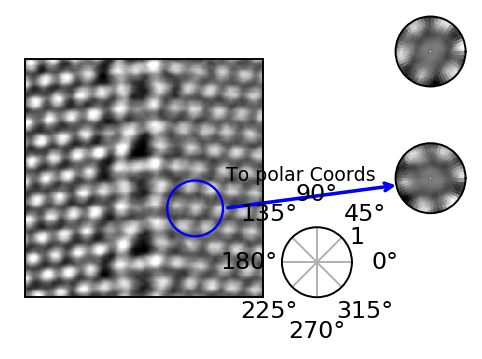

In [14]:
# Plot figure with subplots of different sizes

fontsize=8
fig, ax1 = plt.subplots(figsize=(2.5,2.5))
fig.set_dpi(1024/6)
# set up subplot grid
gridspec.GridSpec(3,3)

# large subplot1
ax = plt.subplot2grid((4,4), (0,0), colspan=3, rowspan=3)
plt.imshow(image,cmap='gray')
plt.xticks([])
plt.yticks([])
center1 = np.array((170,150))  # coordinate in the image
patch_w = 15
region_w = 40
circle1 = Circle((center[1],center[0]), radius=radius,fill=False,color='b')
#plt.plot([center[1],],center[0], 'rx')
plt.annotate('', fontsize=fontsize, xy=(center[1]+30,center[0]),
            xycoords='data', xytext=(75, 10),
            textcoords='offset points',
            arrowprops=dict(arrowstyle="<-",
                            linewidth = 1.5,
                            color = 'blue')
            )

ax.add_patch(circle1)
ax.text(215,130,'To polar Coords',fontsize=fontsize,color='k')
ax = plt.subplot2grid((4,4),(1,3), colspan=1, rowspan=1,projection="polar")

pos = ax.pcolormesh(theta, r, data,cmap='gray')
ax.set_xticks([])
ax.set_yticks([])
l, b, w, h = ax.get_position().bounds
ax.set_position([1., b, w, 1*h])
plt.xticks([])
plt.yticks([])

ax = plt.subplot2grid((4,4),(0,3), colspan=1, rowspan=1,projection="polar")
l, b, w, h = ax.get_position().bounds

data_rotate = np.roll(data, 10, axis=1)
pos = ax.pcolormesh(theta, r, data_rotate,cmap='gray')
ax.set_position([1., b+0.1, w, 1*h])
plt.xticks([])
plt.yticks([])

data_reflect = 

ax = plt.subplot2grid((4,4),(2,3), colspan=1, rowspan=1,projection="polar")
l, b, w, h = ax.get_position().bounds
pos = ax.pcolormesh(theta, r, data_reflect,cmap='gray')
ax.set_position([1., b-0.1, w, 1*h])
plt.xticks([])
plt.yticks([])


In [219]:
plane = 15
half_nt = int(nt/2)
quarter_plane = int(nt/4)
data_roll = np.roll(data, -plane, axis=1)
data_24 = data_roll[:, quarter_plane:(quarter_plane+half_nt+1)]
theta_index = np.arange((quarter_plane+half_nt+1),(quarter_plane+half_nt + half_nt) ) % nt
data_13 = data_roll[:,theta_index]
data_24_flip = np.flip(data_24, axis=1)
data_13_flip = np.flip(data_13,axis=1)
data_o = np.concatenate([data_13,data_24],axis=1)
data_o = np.roll(data_o, plane, axis=1)
data_reflect = np.concatenate([data_13_flip,data_24_flip,axis=1)
data_reflect = np.roll(data_reflect, plane, axis=1)

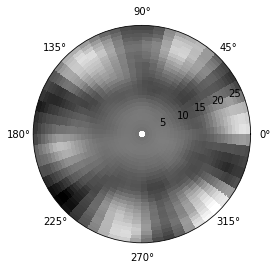

In [220]:
plt.subplot(projection="polar")
plt.pcolormesh(theta, r, data,cmap='gray')

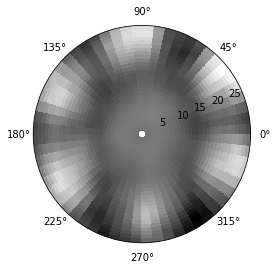

In [222]:
plt.subplot(projection="polar")
plt.pcolormesh(theta, r, data_o,cmap='gray')

NameError: name 'data_reflect' is not defined

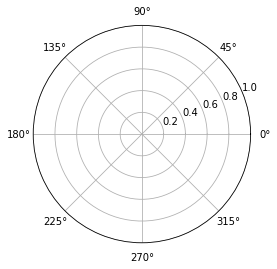

In [15]:
plt.subplot(projection="polar")
plt.pcolormesh(theta, r, data_reflect,cmap='gray')